###### Author: Jennifer Sandoval

# Exploratory Data Analysis and visualization 

In [ ]:
#Installing libraries
!pip install pandas
!pip install seaborn
!pip install numpy
!pip install matplotlib 
!pip install squarify

In [1]:
#Importing installed libraries
import pandas as pd
import seaborn as sn
import numpy as np 
import matplotlib.pyplot as plt
import squarify

## Microorganisms analysis

Reading data from reports generated with kraken from all samples

In [52]:
df1= pd.read_csv('all_samples_report.txt', sep='\t')
df1

,Sample ID,../MWA/H_ERR1398076/kraken/ERR1398076_kraken.out,../MWA/H_ERR1398077/kraken/ERR1398077_kraken.out,../MWA/H_ERR1398085/kraken/ERR1398085_kraken.out,../MWA/H_ERR1398168/kraken/ERR1398168_kraken.out,../MWA/H_ERR1398068/kraken/ERR1398068_kraken.out,../MWA/H_ERR1398221/kraken/ERR1398221_kraken.out,../MWA/NH_ERR1398129/kraken/ERR1398129_kraken.out,../MWA/NH_ERR1398206/kraken/ERR1398206_kraken.out,../MWA/NH_ERR1398263/kraken/ERR1398263_kraken.out,../MWA/NH_ERR1398078/kraken/ERR1398078_kraken.out,../MWA/NH_ERR1398257/kraken/ERR1398257_kraken.out,../MWA/NH_ERR1398089/kraken/ERR1398089_kraken.out
0,d__Viruses,3,2,4,3,3,5,0,0,2,5,5,1
1,d__Bacteria,31963,42611,35589,40358,40358,40408,23752,36306,39112,35631,26081,39856
2,d__Archaea,19,9,3,20,20,25,4,17,9,8,1,11
3,d__Bacteria|p__Proteobacteria,11613,8114,4191,7542,7542,1898,759,4481,6342,5974,3689,11458
4,d__Bacteria|p__Candidatus_Saccharibacteria,0,3,2,0,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494,d__Archaea|p__Euryarchaeota|c__Methanomicrobia...,0,1,0,0,0,0,1,0,0,0,0,0
3495,d__Archaea|p__Euryarchaeota|c__Methanomicrobia...,0,0,0,0,0,0,0,1,0,0,0,0
3496,d__Archaea|p__Euryarchaeota|c__Methanomicrobia...,0,0,0,0,0,1,0,0,0,0,0,1
3497,d__Archaea|p__Euryarchaeota|c__Methanomicrobia...,1,0,0,2,2,4,0,2,1,2,0,0


Set new name of columns

In [53]:
df1 =df1.set_axis(['taxa','ERR1398076', 'ERR1398077', 'ERR1398085', 'ERR1398168', 'ERR1398068', 'ERR1398221', 'ERR1398129', 'ERR1398206', 'ERR1398263', 'ERR1398078', 'ERR1398257', 'ERR1398089'], axis='columns')
df1

,taxa,ERR1398076,ERR1398077,ERR1398085,ERR1398168,ERR1398068,ERR1398221,ERR1398129,ERR1398206,ERR1398263,ERR1398078,ERR1398257,ERR1398089
0,d__Viruses,3,2,4,3,3,5,0,0,2,5,5,1
1,d__Bacteria,31963,42611,35589,40358,40358,40408,23752,36306,39112,35631,26081,39856
2,d__Archaea,19,9,3,20,20,25,4,17,9,8,1,11
3,d__Bacteria|p__Proteobacteria,11613,8114,4191,7542,7542,1898,759,4481,6342,5974,3689,11458
4,d__Bacteria|p__Candidatus_Saccharibacteria,0,3,2,0,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494,d__Archaea|p__Euryarchaeota|c__Methanomicrobia...,0,1,0,0,0,0,1,0,0,0,0,0
3495,d__Archaea|p__Euryarchaeota|c__Methanomicrobia...,0,0,0,0,0,0,0,1,0,0,0,0
3496,d__Archaea|p__Euryarchaeota|c__Methanomicrobia...,0,0,0,0,0,1,0,0,0,0,0,1
3497,d__Archaea|p__Euryarchaeota|c__Methanomicrobia...,1,0,0,2,2,4,0,2,1,2,0,0


Parse taxonomic classification for each read

In [54]:
df1['domain']=df1['taxa'].str.split('|').str[0].str.split('_').str[2]
df1['phylo']=df1['taxa'].str.split('|').str[1].str.split('_').str[2]
df1['class']=df1['taxa'].str.split('|').str[2].str.split('_').str[2]
df1['order']=df1['taxa'].str.split('|').str[3].str.split('_').str[2]
df1['family']=df1['taxa'].str.split('|').str[4].str.split('_').str[2]
df1['genus']=df1['taxa'].str.split('|').str[5].str.split('_').str[2]
df1['specie']=df1['taxa'].str.split('|').str[6].str.split('_').str[2]
df1

,taxa,ERR1398076,ERR1398077,ERR1398085,ERR1398168,ERR1398068,ERR1398221,ERR1398129,ERR1398206,ERR1398263,ERR1398078,ERR1398257,ERR1398089,domain,phylo,class,order,family,genus,specie
0,d__Viruses,3,2,4,3,3,5,0,0,2,5,5,1,Viruses,NaN,NaN,NaN,NaN,NaN,NaN
1,d__Bacteria,31963,42611,35589,40358,40358,40408,23752,36306,39112,35631,26081,39856,Bacteria,NaN,NaN,NaN,NaN,NaN,NaN
2,d__Archaea,19,9,3,20,20,25,4,17,9,8,1,11,Archaea,NaN,NaN,NaN,NaN,NaN,NaN
3,d__Bacteria|p__Proteobacteria,11613,8114,4191,7542,7542,1898,759,4481,6342,5974,3689,11458,Bacteria,Proteobacteria,NaN,NaN,NaN,NaN,NaN
4,d__Bacteria|p__Candidatus_Saccharibacteria,0,3,2,0,0,0,0,0,0,2,0,0,Bacteria,Candidatus,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494,d__Archaea|p__Euryarchaeota|c__Methanomicrobia...,0,1,0,0,0,0,1,0,0,0,0,0,Archaea,Euryarchaeota,Methanomicrobia,Methanosarcinales,Methanosarcinaceae,Methanococcoides,Methanococcoides
3495,d__Archaea|p__Euryarchaeota|c__Methanomicrobia...,0,0,0,0,0,0,0,1,0,0,0,0,Archaea,Euryarchaeota,Methanomicrobia,Methanosarcinales,Methanosarcinaceae,Methanomethylovorans,Methanomethylovorans
3496,d__Archaea|p__Euryarchaeota|c__Methanomicrobia...,0,0,0,0,0,1,0,0,0,0,0,1,Archaea,Euryarchaeota,Methanomicrobia,Methanosarcinales,Methanosaetaceae,Methanosaeta,Methanosaeta
3497,d__Archaea|p__Euryarchaeota|c__Methanomicrobia...,1,0,0,2,2,4,0,2,1,2,0,0,Archaea,Euryarchaeota,Methanomicrobia,Methanocellales,Methanocellaceae,Methanocella,Methanocella


Create a subset for hypertension samples

In [5]:
H = df1[['taxa', 'domain', 'phylo','class','order','family','genus','specie','ERR1398076', 'ERR1398077', 'ERR1398085', 'ERR1398168', 'ERR1398068', 'ERR1398221' ]]
H.loc[:,'total']= H.sum(numeric_only=True, axis=1)
H

C:\Users\Jenni\AppData\Local\Temp\ipykernel_4756\1626768856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H.loc[:,'total']= H.sum(numeric_only=True, axis=1)


,taxa,domain,phylo,class,order,family,genus,specie,ERR1398076,ERR1398077,ERR1398085,ERR1398168,ERR1398068,ERR1398221,total
0,d__Viruses,Viruses,NaN,NaN,NaN,NaN,NaN,NaN,3,2,4,3,3,5,20
1,d__Bacteria,Bacteria,NaN,NaN,NaN,NaN,NaN,NaN,31963,42611,35589,40358,40358,40408,231287
2,d__Archaea,Archaea,NaN,NaN,NaN,NaN,NaN,NaN,19,9,3,20,20,25,96
3,d__Bacteria|p__Proteobacteria,Bacteria,Proteobacteria,NaN,NaN,NaN,NaN,NaN,11613,8114,4191,7542,7542,1898,40900
4,d__Bacteria|p__Candidatus_Saccharibacteria,Bacteria,Candidatus,NaN,NaN,NaN,NaN,NaN,0,3,2,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494,d__Archaea|p__Euryarchaeota|c__Methanomicrobia...,Archaea,Euryarchaeota,Methanomicrobia,Methanosarcinales,Methanosarcinaceae,Methanococcoides,Methanococcoides,0,1,0,0,0,0,1
3495,d__Archaea|p__Euryarchaeota|c__Methanomicrobia...,Archaea,Euryarchaeota,Methanomicrobia,Methanosarcinales,Methanosarcinaceae,Methanomethylovorans,Methanomethylovorans,0,0,0,0,0,0,0
3496,d__Archaea|p__Euryarchaeota|c__Methanomicrobia...,Archaea,Euryarchaeota,Methanomicrobia,Methanosarcinales,Methanosaetaceae,Methanosaeta,Methanosaeta,0,0,0,0,0,1,1
3497,d__Archaea|p__Euryarchaeota|c__Methanomicrobia...,Archaea,Euryarchaeota,Methanomicrobia,Methanocellales,Methanocellaceae,Methanocella,Methanocella,1,0,0,2,2,4,9


Create a subset for no hypertension samples

In [13]:
NH = df1[['taxa', 'domain', 'phylo','class','order','family','genus','specie','ERR1398129', 'ERR1398206', 'ERR1398263', 'ERR1398078', 'ERR1398257', 'ERR1398089' ]]
NH.loc[:,'total']= NH.sum(numeric_only=True, axis=1)
NH

C:\Users\Jenni\AppData\Local\Temp\ipykernel_4756\1143905776.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NH.loc[:,'total']= NH.sum(numeric_only=True, axis=1)


,taxa,domain,phylo,class,order,family,genus,specie,ERR1398129,ERR1398206,ERR1398263,ERR1398078,ERR1398257,ERR1398089,total
0,d__Viruses,Viruses,NaN,NaN,NaN,NaN,NaN,NaN,0,0,2,5,5,1,13
1,d__Bacteria,Bacteria,NaN,NaN,NaN,NaN,NaN,NaN,23752,36306,39112,35631,26081,39856,200738
2,d__Archaea,Archaea,NaN,NaN,NaN,NaN,NaN,NaN,4,17,9,8,1,11,50
3,d__Bacteria|p__Proteobacteria,Bacteria,Proteobacteria,NaN,NaN,NaN,NaN,NaN,759,4481,6342,5974,3689,11458,32703
4,d__Bacteria|p__Candidatus_Saccharibacteria,Bacteria,Candidatus,NaN,NaN,NaN,NaN,NaN,0,0,0,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494,d__Archaea|p__Euryarchaeota|c__Methanomicrobia...,Archaea,Euryarchaeota,Methanomicrobia,Methanosarcinales,Methanosarcinaceae,Methanococcoides,Methanococcoides,1,0,0,0,0,0,1
3495,d__Archaea|p__Euryarchaeota|c__Methanomicrobia...,Archaea,Euryarchaeota,Methanomicrobia,Methanosarcinales,Methanosarcinaceae,Methanomethylovorans,Methanomethylovorans,0,1,0,0,0,0,1
3496,d__Archaea|p__Euryarchaeota|c__Methanomicrobia...,Archaea,Euryarchaeota,Methanomicrobia,Methanosarcinales,Methanosaetaceae,Methanosaeta,Methanosaeta,0,0,0,0,0,1,1
3497,d__Archaea|p__Euryarchaeota|c__Methanomicrobia...,Archaea,Euryarchaeota,Methanomicrobia,Methanocellales,Methanocellaceae,Methanocella,Methanocella,0,2,1,2,0,0,5


### Domain

#### Hypertension

In [6]:
H_domain = H.groupby(['domain']).sum()
H_domain

C:\Users\Jenni\AppData\Local\Temp\ipykernel_4756\2946051323.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  H_domain = H.groupby(['domain']).sum()


,ERR1398076,ERR1398077,ERR1398085,ERR1398168,ERR1398068,ERR1398221,total
domain,,,,,,,
Archaea,118,56,21,119,119,149,582
Bacteria,198995,278990,235632,257397,257397,256258,1484669
Viruses,10,9,13,13,13,16,74


#### No hypertension

In [14]:
NH_domain = NH.groupby(['domain']).sum()
NH_domain

C:\Users\Jenni\AppData\Local\Temp\ipykernel_4756\4020815433.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  NH_domain = NH.groupby(['domain']).sum()


,ERR1398129,ERR1398206,ERR1398263,ERR1398078,ERR1398257,ERR1398089,total
domain,,,,,,,
Archaea,28,108,56,49,7,71,319
Bacteria,157151,232780,257160,230164,171650,254939,1303844
Viruses,0,0,5,10,16,5,36


### Phylo

#### Hypertension

C:\Users\Jenni\AppData\Local\Temp\ipykernel_4756\2763685842.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  H_phylo = H[ H['domain']=='Bacteria'].groupby(['phylo']).sum().sort_values(by=['total'], ascending=False)


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Bacteroidetes'),
  Text(1, 0, 'Firmicutes'),
  Text(2, 0, 'Proteobacteria'),
  Text(3, 0, 'Actinobacteria'),
  Text(4, 0, 'Fusobacteria')])

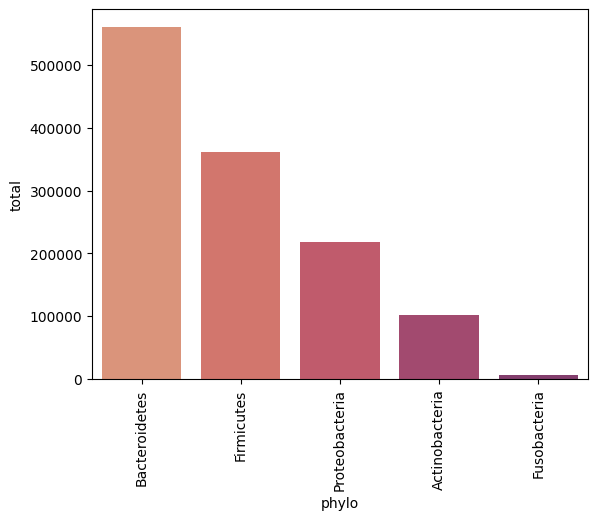

In [30]:
H_phylo = H[ H['domain']=='Bacteria'].groupby(['phylo']).sum().sort_values(by=['total'], ascending=False)
H_phylo = H_phylo.head(5)
H_phylo.reset_index(inplace=True)
sn.set_palette("flare")
sn.barplot(x ='phylo', y='total', data=H_phylo)

plt.xticks(rotation=90)

#### No hypertension

C:\Users\Jenni\AppData\Local\Temp\ipykernel_4756\3724145207.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  NH_phylo = NH[ NH['domain']=='Bacteria'].groupby(['phylo']).sum().sort_values(by=['total'], ascending=False)


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Bacteroidetes'),
  Text(1, 0, 'Firmicutes'),
  Text(2, 0, 'Proteobacteria'),
  Text(3, 0, 'Actinobacteria'),
  Text(4, 0, 'Verrucomicrobia')])

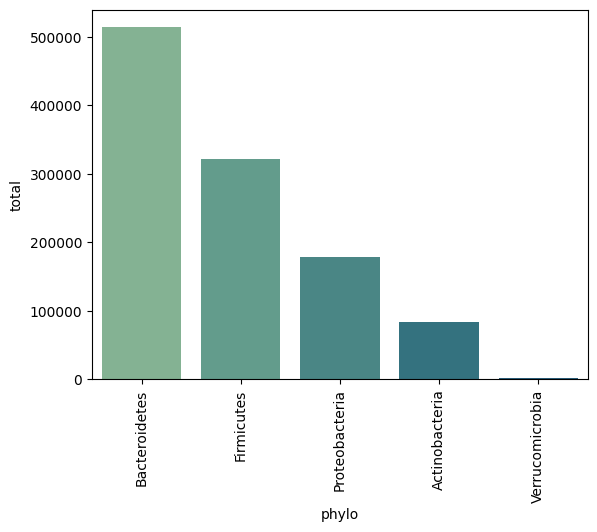

In [59]:
NH_phylo = NH[ NH['domain']=='Bacteria'].groupby(['phylo']).sum().sort_values(by=['total'], ascending=False)
NH_phylo = NH_phylo.head(5)
NH_phylo.reset_index(inplace=True)
sn.set_palette("crest")
sn.barplot(x ='phylo', y='total', data=NH_phylo)

plt.xticks(rotation=90)

### Class

#### Hypertension

C:\Users\Jenni\AppData\Local\Temp\ipykernel_4756\3961615405.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  H_class = H[ H['domain']=='Bacteria'].groupby(['class']).sum().sort_values(by=['total'], ascending=False)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bacteroidia'),
  Text(1, 0, 'Clostridia'),
  Text(2, 0, 'Gammaproteobacteria'),
  Text(3, 0, 'Actinobacteria'),
  Text(4, 0, 'Coriobacteriia'),
  Text(5, 0, 'Negativicutes'),
  Text(6, 0, 'Deltaproteobacteria'),
  Text(7, 0, 'Bacilli'),
  Text(8, 0, 'Betaproteobacteria'),
  Text(9, 0, 'Alphaproteobacteria')])

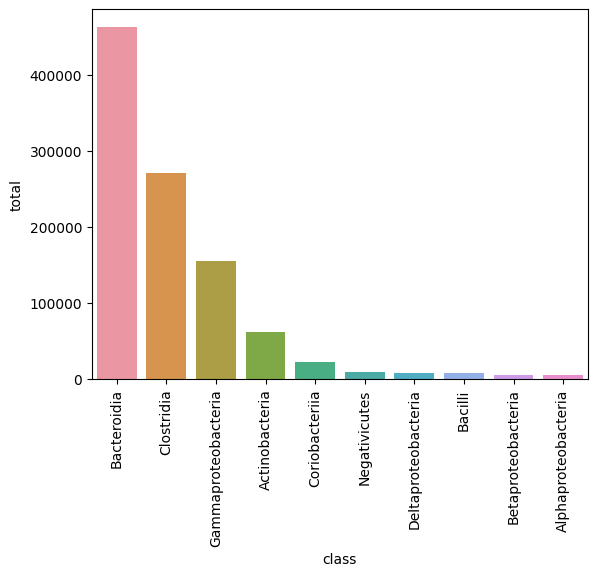

In [60]:
H_class = H[ H['domain']=='Bacteria'].groupby(['class']).sum().sort_values(by=['total'], ascending=False)
H_class = H_class.head(10)
H_class.reset_index(inplace=True)
sn.set_palette("magma")
sn.barplot(x ='class', y='total', data=H_class)

plt.xticks(rotation=90)

#### No hypertension

C:\Users\Jenni\AppData\Local\Temp\ipykernel_4756\2844788528.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  NH_class = NH[ NH['domain']=='Bacteria'].groupby(['class']).sum().sort_values(by=['total'], ascending=False)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bacteroidia'),
  Text(1, 0, 'Clostridia'),
  Text(2, 0, 'Gammaproteobacteria'),
  Text(3, 0, 'Actinobacteria'),
  Text(4, 0, 'Coriobacteriia'),
  Text(5, 0, 'Negativicutes'),
  Text(6, 0, 'Bacilli'),
  Text(7, 0, 'Betaproteobacteria'),
  Text(8, 0, 'Erysipelotrichia'),
  Text(9, 0, 'Deltaproteobacteria')])

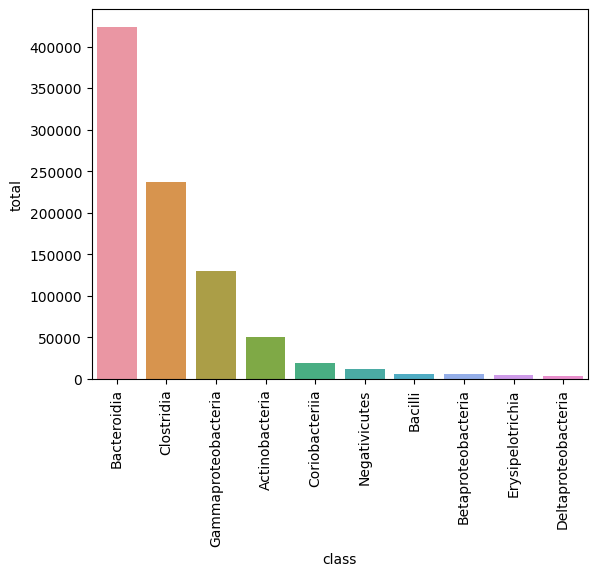

In [57]:
NH_class = NH[ NH['domain']=='Bacteria'].groupby(['class']).sum().sort_values(by=['total'], ascending=False)
NH_class = NH_class.head(10)
NH_class.reset_index(inplace=True)
sn.set_palette("crest")
sn.barplot(x ='class', y='total', data=NH_class)

plt.xticks(rotation=90)

### Genus

#### Hypertension

C:\Users\Jenni\AppData\Local\Temp\ipykernel_4756\76892988.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  H_class = H[ H['domain']=='Bacteria'].groupby(['genus']).sum().sort_values(by=['total'], ascending=False)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bacteroides'),
  Text(1, 0, 'Bifidobacterium'),
  Text(2, 0, 'Parabacteroides'),
  Text(3, 0, 'Alistipes'),
  Text(4, 0, 'Odoribacter'),
  Text(5, 0, 'Lachnoclostridium'),
  Text(6, 0, 'Escherichia'),
  Text(7, 0, 'Roseburia'),
  Text(8, 0, 'Ruminococcus'),
  Text(9, 0, 'Klebsiella')])

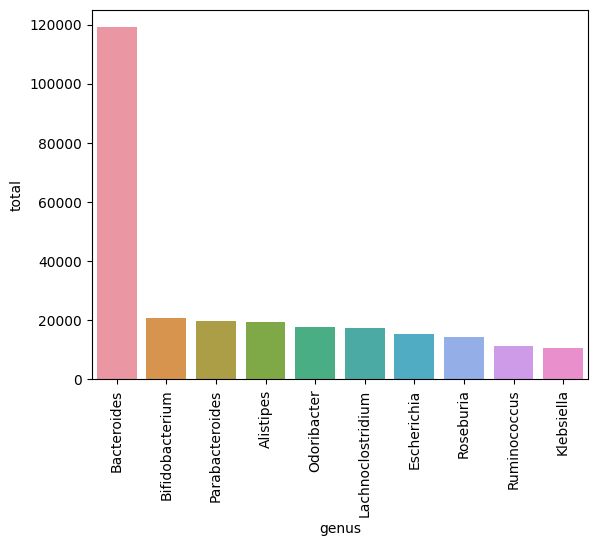

In [46]:
H_class = H[ H['domain']=='Bacteria'].groupby(['genus']).sum().sort_values(by=['total'], ascending=False)
H_class = H_class.head(10)
H_class.reset_index(inplace=True)
sn.set_palette("magma")
sn.barplot(x ='genus', y='total', data=H_class)

plt.xticks(rotation=90)

#### No hypertension

C:\Users\Jenni\AppData\Local\Temp\ipykernel_4756\4185317721.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  NH_class = NH[ NH['domain']=='Bacteria'].groupby(['genus']).sum().sort_values(by=['total'], ascending=False)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bacteroides'),
  Text(1, 0, 'Parabacteroides'),
  Text(2, 0, 'Alistipes'),
  Text(3, 0, 'Bifidobacterium'),
  Text(4, 0, 'Roseburia'),
  Text(5, 0, 'Odoribacter'),
  Text(6, 0, 'Klebsiella'),
  Text(7, 0, 'Lachnoclostridium'),
  Text(8, 0, 'Enterobacter'),
  Text(9, 0, 'Eubacterium')])

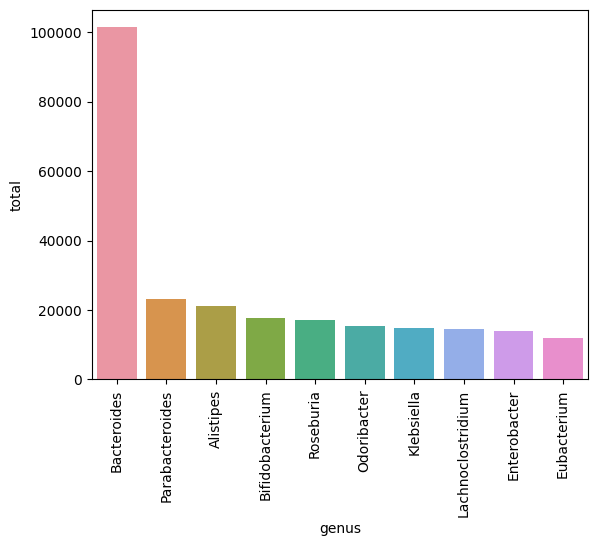

In [61]:
NH_class = NH[ NH['domain']=='Bacteria'].groupby(['genus']).sum().sort_values(by=['total'], ascending=False)
NH_class = NH_class.head(10)
NH_class.reset_index(inplace=True)
sn.set_palette("magma")
sn.barplot(x ='genus', y='total', data=NH_class)

plt.xticks(rotation=90)

### Specie

#### Hypertension

In [ ]:
H_specie = H[ H['domain']=='Bacteria'].groupby(['specie']).sum().sort_values(by=['total'], ascending=False)
H_specie = H_specie.head(20)
H_specie.reset_index(inplace=True)
sn.set_palette("magma")
sn.barplot(x ='specie', y='total', data=H_specie)

plt.xticks(rotation=90)

#### No hypertension

C:\Users\Jenni\AppData\Local\Temp\ipykernel_4756\1011899318.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  NH_class = NH[ NH['domain']=='Bacteria'].groupby(['specie']).sum().sort_values(by=['total'], ascending=False)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Bacteroides'),
  Text(1, 0, 'Alistipes'),
  Text(2, 0, 'Roseburia'),
  Text(3, 0, 'Bifidobacterium'),
  Text(4, 0, 'Parabacteroides'),
  Text(5, 0, 'Odoribacter'),
  Text(6, 0, 'Klebsiella'),
  Text(7, 0, '[Eubacterium]'),
  Text(8, 0, '[Clostridium]'),
  Text(9, 0, 'Enterobacter'),
  Text(10, 0, 'Anaerostipes'),
  Text(11, 0, 'Haemophilus'),
  Text(12, 0, 'Escherichia'),
  Text(13, 0, 'Eggerthella'),
  Text(14, 0, 'Ruminococcus'),
  Text(15, 0, 'Lachnoclostridium'),
  Text(16, 0, 'Blautia'),
  Text(17, 0, 'Clostridioides'),
  Text(18, 0, 'Veillonella'),
  Text(19, 0, 'Megasphaera')])

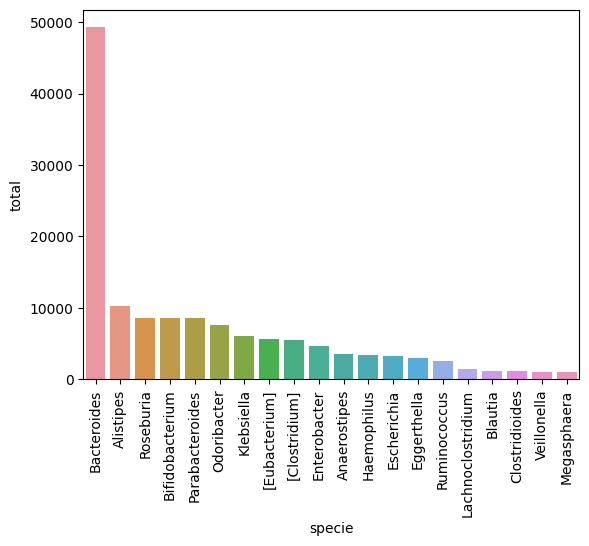

In [67]:
NH_specie = NH[ NH['domain']=='Bacteria'].groupby(['specie']).sum().sort_values(by=['total'], ascending=False)
NH_specie = NH_specie.head(20)
NH_specie.reset_index(inplace=True)
sn.set_palette("magma")
sn.barplot(x ='specie', y='total', data=NH_specie)

plt.xticks(rotation=90)

### Viruses

#### Hypertension

C:\Users\Jenni\AppData\Local\Temp\ipykernel_4756\1692351579.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  H_class = H[ H['domain']=='Viruses'].groupby(['phylo']).sum().sort_values(by=['total'], ascending=False)


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Caudovirales'),
  Text(1, 0, 'Iridoviridae'),
  Text(2, 0, 'Microviridae'),
  Text(3, 0, 'Mimiviridae'),
  Text(4, 0, 'Inoviridae')])

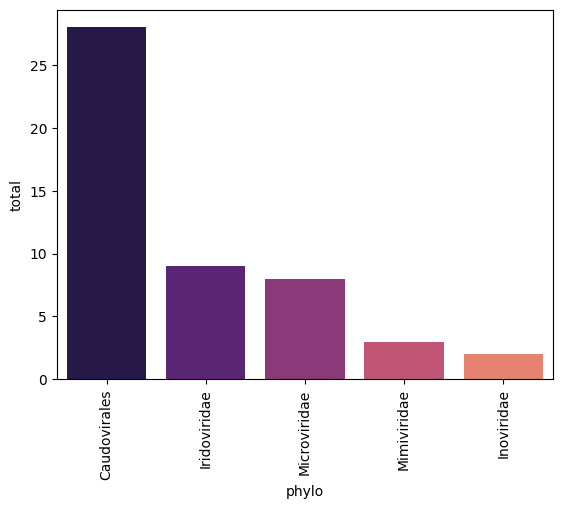

In [64]:
H_class = H[ H['domain']=='Viruses'].groupby(['phylo']).sum().sort_values(by=['total'], ascending=False)
H_class = H_class.head(5)
H_class.reset_index(inplace=True)
sn.set_palette("magma")
sn.barplot(x ='phylo', y='total', data=H_class)

plt.xticks(rotation=90)

#### No hypertension

C:\Users\Jenni\AppData\Local\Temp\ipykernel_4756\3452605738.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  NH_class = NH[ NH['domain']=='Viruses'].groupby(['phylo']).sum().sort_values(by=['total'], ascending=False)


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Caudovirales'),
  Text(1, 0, 'uncultured'),
  Text(2, 0, 'Baculoviridae'),
  Text(3, 0, 'Microviridae'),
  Text(4, 0, 'Vibrio')])

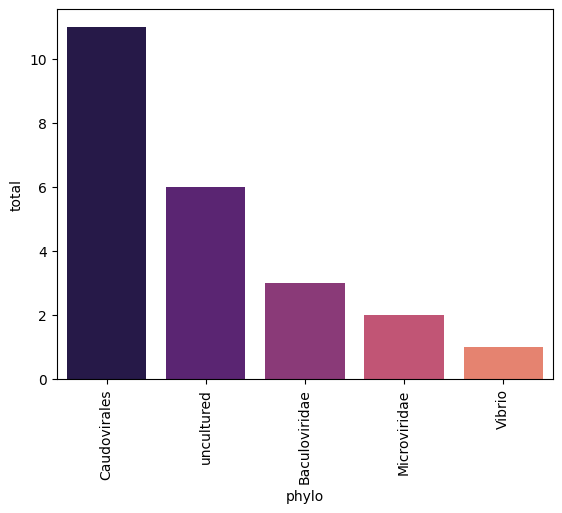

In [65]:
NH_class = NH[ NH['domain']=='Viruses'].groupby(['phylo']).sum().sort_values(by=['total'], ascending=False)
NH_class = NH_class.head(5)
NH_class.reset_index(inplace=True)
sn.set_palette("magma")
sn.barplot(x ='phylo', y='total', data=NH_class)

plt.xticks(rotation=90)

## Subsystem analysis

In [2]:
df2= pd.read_csv('output_subsystem_level_3.txt', sep='\t')
df2

,Subsystem 3,ERR1398068,ERR1398076,ERR1398077,ERR1398085,ERR1398168,ERR1398221,ERR1398078,ERR1398089,ERR1398129,ERR1398206,ERR1398257,ERR1398263
0,&#945;-Fimbriae,3.000000,0.000000,1.000000,4.000000,3.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.212121,0.000000
1,&#946;-Fimbriae,1.000000,4.000000,0.000000,3.000000,1.000000,0.000000,0.000000,9.00,0.000000,0.000000,1.000000,0.000000
2,&#963;-Fimbriae,2.000000,10.000000,0.000000,0.000000,2.000000,0.000000,4.000000,9.00,0.000000,0.000000,0.000000,0.000000
3,(GlcNAc)2 Catabolic Operon,6.000000,10.000000,2.000000,0.000000,6.000000,19.000000,2.000000,6.00,2.000000,4.000000,0.000000,8.000000
4,2-Ketogluconate Utilization,3.500000,11.000000,6.500000,2.000000,3.500000,0.000000,4.500000,18.00,0.000000,4.500000,0.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,tRNA processing,198.426190,185.701190,166.042857,126.333333,198.426190,268.933333,158.292857,156.15,84.616667,201.983333,118.200000,186.202381
959,tRNA splicing,1.500000,0.000000,0.500000,1.000000,1.500000,0.000000,0.500000,1.50,1.000000,0.000000,2.000000,1.500000
960,tRNA-dependent amino acid transfers,4.000000,2.000000,1.000000,0.000000,4.000000,1.000000,1.000000,3.00,2.000000,0.000000,0.000000,0.000000
961,tRNA-methylthiotransferase containing cluster,3.509524,5.751190,3.342857,0.250000,3.509524,0.500000,1.366667,4.70,0.000000,1.916667,0.000000,2.035714


In [4]:
H_subsystem = df2[['Subsystem 3','ERR1398076', 'ERR1398077', 'ERR1398085', 'ERR1398168', 'ERR1398068', 'ERR1398221' ]]
H_subsystem.loc[:,'total']= H_subsystem.sum(numeric_only=True, axis=1)
H_subsystem

C:\Users\Jenni\AppData\Local\Temp\ipykernel_15420\1299511495.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H_subsystem.loc[:,'total']= H_subsystem.sum(numeric_only=True, axis=1)


,Subsystem 3,ERR1398076,ERR1398077,ERR1398085,ERR1398168,ERR1398068,ERR1398221,total
0,&#945;-Fimbriae,0.000000,1.000000,4.000000,3.000000,3.000000,0.000000,11.000000
1,&#946;-Fimbriae,4.000000,0.000000,3.000000,1.000000,1.000000,0.000000,9.000000
2,&#963;-Fimbriae,10.000000,0.000000,0.000000,2.000000,2.000000,0.000000,14.000000
3,(GlcNAc)2 Catabolic Operon,10.000000,2.000000,0.000000,6.000000,6.000000,19.000000,43.000000
4,2-Ketogluconate Utilization,11.000000,6.500000,2.000000,3.500000,3.500000,0.000000,26.500000
...,...,...,...,...,...,...,...,...
958,tRNA processing,185.701190,166.042857,126.333333,198.426190,198.426190,268.933333,1143.863095
959,tRNA splicing,0.000000,0.500000,1.000000,1.500000,1.500000,0.000000,4.500000
960,tRNA-dependent amino acid transfers,2.000000,1.000000,0.000000,4.000000,4.000000,1.000000,12.000000
961,tRNA-methylthiotransferase containing cluster,5.751190,3.342857,0.250000,3.509524,3.509524,0.500000,16.863095


In [8]:
NH_subsystem = df2[['Subsystem 3','ERR1398129', 'ERR1398206', 'ERR1398263', 'ERR1398078', 'ERR1398257', 'ERR1398089']]
NH_subsystem.loc[:,'total']= NH_subsystem.sum(numeric_only=True, axis=1)
NH_subsystem

C:\Users\Jenni\AppData\Local\Temp\ipykernel_15420\3479257316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NH_subsystem.loc[:,'total']= NH_subsystem.sum(numeric_only=True, axis=1)


,Subsystem 3,ERR1398129,ERR1398206,ERR1398263,ERR1398078,ERR1398257,ERR1398089,total
0,&#945;-Fimbriae,0.000000,0.000000,0.000000,0.000000,0.212121,0.00,0.212121
1,&#946;-Fimbriae,0.000000,0.000000,0.000000,0.000000,1.000000,9.00,10.000000
2,&#963;-Fimbriae,0.000000,0.000000,0.000000,4.000000,0.000000,9.00,13.000000
3,(GlcNAc)2 Catabolic Operon,2.000000,4.000000,8.000000,2.000000,0.000000,6.00,22.000000
4,2-Ketogluconate Utilization,0.000000,4.500000,2.000000,4.500000,0.000000,18.00,29.000000
...,...,...,...,...,...,...,...,...
958,tRNA processing,84.616667,201.983333,186.202381,158.292857,118.200000,156.15,905.445238
959,tRNA splicing,1.000000,0.000000,1.500000,0.500000,2.000000,1.50,6.500000
960,tRNA-dependent amino acid transfers,2.000000,0.000000,0.000000,1.000000,0.000000,3.00,6.000000
961,tRNA-methylthiotransferase containing cluster,0.000000,1.916667,2.035714,1.366667,0.000000,4.70,10.019048


In [6]:
H_proteins = H_subsystem.groupby(['Subsystem 3']).sum().sort_values(by=['total'], ascending=False)
H_proteins

,ERR1398076,ERR1398077,ERR1398085,ERR1398168,ERR1398068,ERR1398221,total
Subsystem 3,,,,,,,
Ton and Tol transport systems,691.165909,1503.743741,1525.327922,1299.794755,1299.794755,2105.273449,8425.100531
DNA-replication,780.942857,815.088131,632.514719,921.687623,921.687623,1157.894048,5229.815002
Phosphate metabolism,721.025000,738.228644,514.243326,815.386905,815.386905,1112.727381,4716.998160
Purine conversions,569.433333,527.996825,357.511386,612.269084,612.269084,848.688095,3528.167807
"Glutamine, Glutamate, Aspartate and Asparagine Biosynthesis",583.250000,513.552381,324.018687,602.763167,602.763167,869.870671,3496.218074
...,...,...,...,...,...,...,...
Methanopterin biosynthesis2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Ribosome SSU chloroplast,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sucrose metabolism in plants,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Ton and Tol transport systems'),
  Text(1, 0, 'DNA-replication'),
  Text(2, 0, 'Phosphate metabolism'),
  Text(3, 0, 'Purine conversions'),
  Text(4, 0, 'Glutamine, Glutamate, Aspartate and Asparagine Biosynthesis'),
  Text(5, 0, 'Multidrug Resistance Efflux Pumps'),
  Text(6, 0, 'De Novo Purine Biosynthesis'),
  Text(7, 0, 'Universal GTPases'),
  Text(8, 0, 'De Novo Pyrimidine Synthesis'),
  Text(9, 0, 'Omega-amidase KE2'),
  Text(10, 0, 'Riboflavin, FMN and FAD metabolism Extended'),
  Text(11, 0, 'CBSS-393121.3.peg.2760'),
  Text(12, 0, 'DNA repair, bacterial'),
  Text(13, 0, 'Methionine Biosynthesis'),
  Text(14, 0, 'Maltose and Maltodextrin Utilization'),
  Text(15, 0, 'Fatty Acid Biosynthesis FASII'),
  Text(16, 0, 'Potassium homeostasis'),
  Text(17, 0, 'Heat shock dnaK gene cluster extended'),
  Text(18, 0, 'Conjugative transposon, Bacteroidales'),
  Text(19, 0, 'DNA 

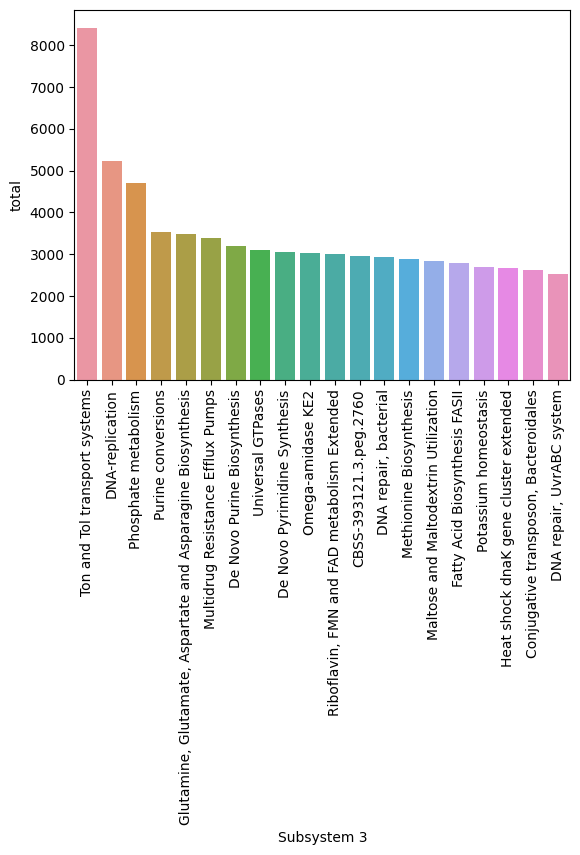

In [7]:
H_proteins = H_proteins.head(20)
H_proteins.reset_index(inplace=True)
sn.set_palette("magma")
sn.barplot(x ='Subsystem 3', y='total', data=H_proteins)

plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Ton and Tol transport systems'),
  Text(1, 0, 'DNA-replication'),
  Text(2, 0, 'Phosphate metabolism'),
  Text(3, 0, 'Purine conversions'),
  Text(4, 0, 'Glutamine, Glutamate, Aspartate and Asparagine Biosynthesis'),
  Text(5, 0, 'Multidrug Resistance Efflux Pumps'),
  Text(6, 0, 'Riboflavin, FMN and FAD metabolism Extended'),
  Text(7, 0, 'De Novo Purine Biosynthesis'),
  Text(8, 0, 'DNA repair, bacterial'),
  Text(9, 0, 'Maltose and Maltodextrin Utilization'),
  Text(10, 0, 'Universal GTPases'),
  Text(11, 0, 'Omega-amidase KE2'),
  Text(12, 0, 'Methionine Biosynthesis'),
  Text(13, 0, 'CBSS-393121.3.peg.2760'),
  Text(14, 0, 'De Novo Pyrimidine Synthesis'),
  Text(15, 0, 'Fatty Acid Biosynthesis FASII'),
  Text(16, 0, 'Potassium homeostasis'),
  Text(17, 0, 'Glycogen metabolism'),
  Text(18, 0, 'Heat shock dnaK gene cluster extended'),
  Text(19, 0, 'Peptidoglycan Biosynth

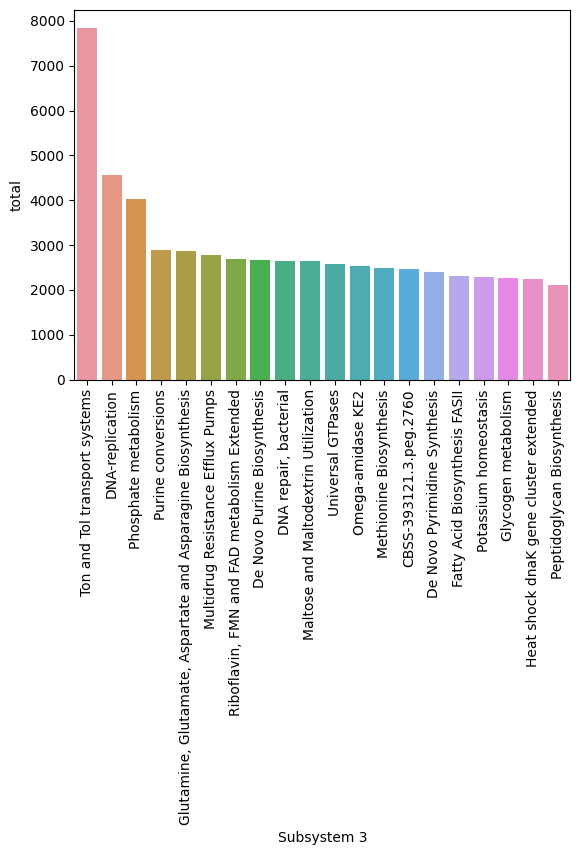

In [9]:
NH_proteins = NH_subsystem.groupby(['Subsystem 3']).sum().sort_values(by=['total'], ascending=False)
NH_proteins
NH_proteins = NH_proteins.head(20)
NH_proteins.reset_index(inplace=True)
sn.set_palette("magma")
sn.barplot(x ='Subsystem 3', y='total', data=NH_proteins)

plt.xticks(rotation=90)